In [111]:
import fiona
import geopandas as gpd
import pandas as pd
import shapely
from shapely import geometry
import json
import googlemaps
import re
from functools import partial
import ast 
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import contextily as cx

In [50]:
places_df = pd.read_csv('../data/places_GP.csv')

# Распределение категорий по среднему рейтингу

Text(0, 0.5, 'Средний нормализованный рейтинг')

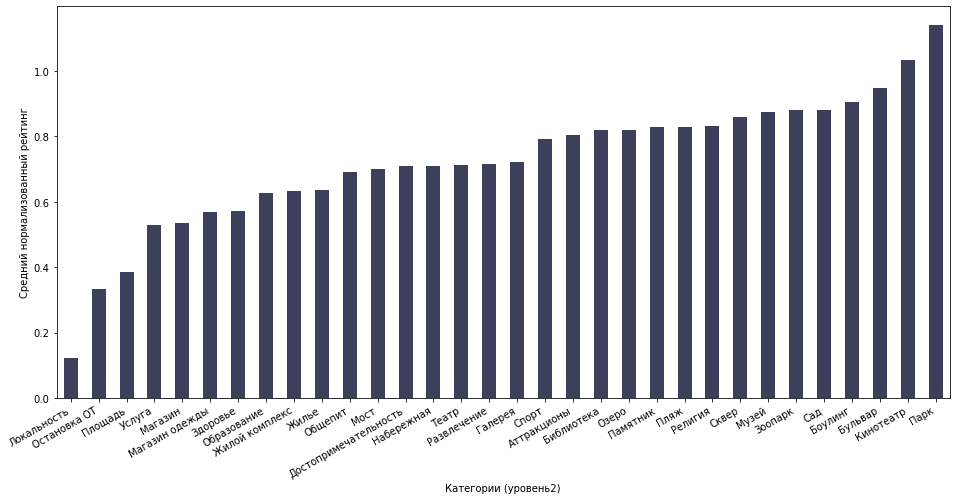

In [41]:
places_df.groupby('category_2').mean()['normalized_rating'].sort_values().plot.bar(color ="#3D405B", figsize = (16, 8))
plt.gcf().autofmt_xdate()
plt.xlabel('Категории (уровень2)')
plt.ylabel('Средний нормализованный рейтинг')

Text(0, 0.5, 'Средний нормализованный рейтинг')

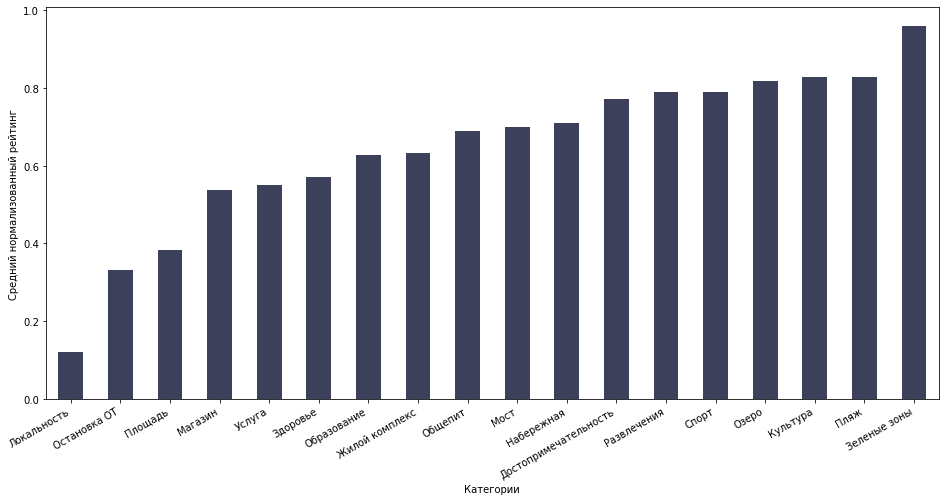

In [42]:
places_df.groupby('category').mean()['normalized_rating'].sort_values().plot.bar(color ="#3D405B", figsize = (16, 8))
plt.gcf().autofmt_xdate()
plt.xlabel('Категории')
plt.ylabel('Средний нормализованный рейтинг')

# Распределение мест по рейтингу и категориям

In [43]:
places_df.sort_values('normalized_rating', ascending = False)[:20].category.drop_duplicates()

1609     Зеленые зоны
1616            Спорт
15425         Магазин
2740      Развлечения
15233            Мост
Name: category, dtype: object

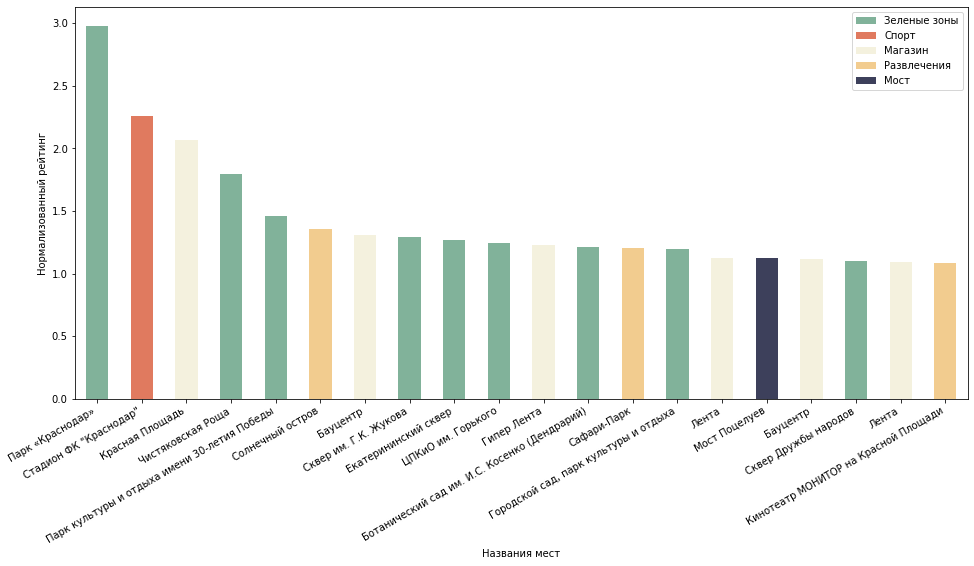

In [44]:
dict_colors = {'Зеленые зоны': "#81B29A", "Спорт": "#E07A5F", "Магазин": "#F4F1DE", "Развлечения":"#F2CC8F", 'Мост':'#3D405B'}
plot_df = places_df.sort_values('normalized_rating', ascending = False)[:20]

plot_df.set_index('title')['normalized_rating'].plot.bar( color = plot_df['category'].replace(dict_colors), figsize = (16, 8))
plt.gcf().autofmt_xdate()
plt.xlabel('Названия мест')
plt.ylabel('Нормализованный рейтинг')

legend_elements = [Patch(facecolor=dict_colors[c], label=c) for c in  dict_colors.keys()]
plt.legend(handles=legend_elements)

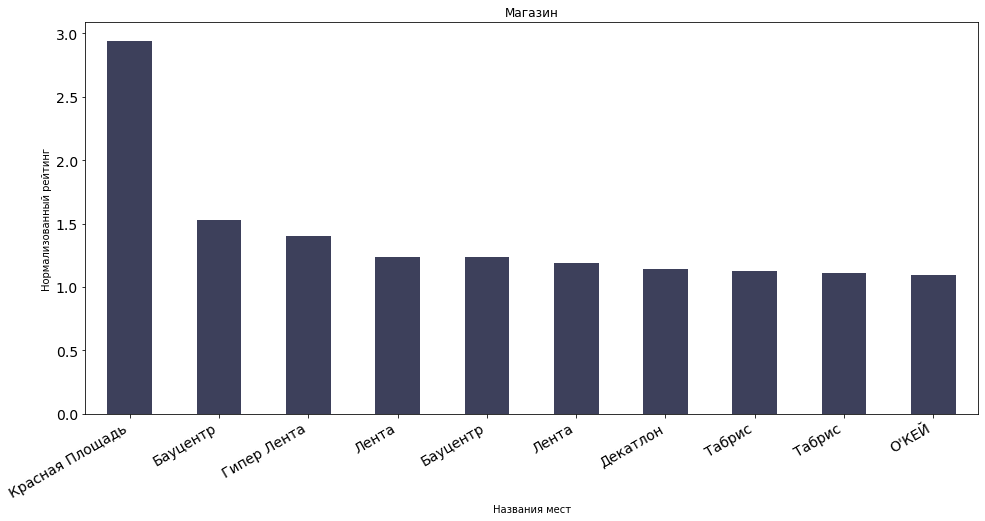

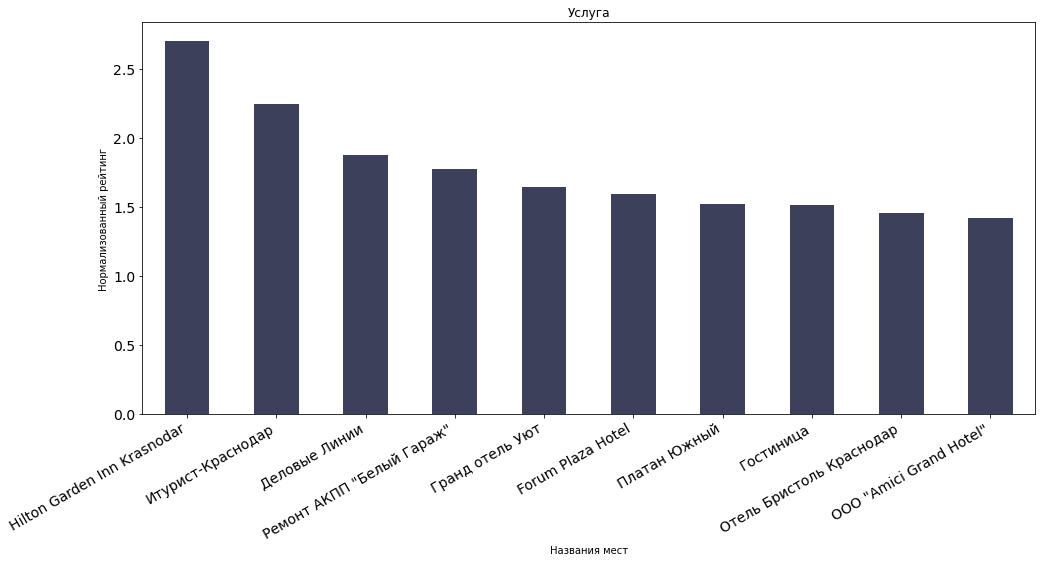

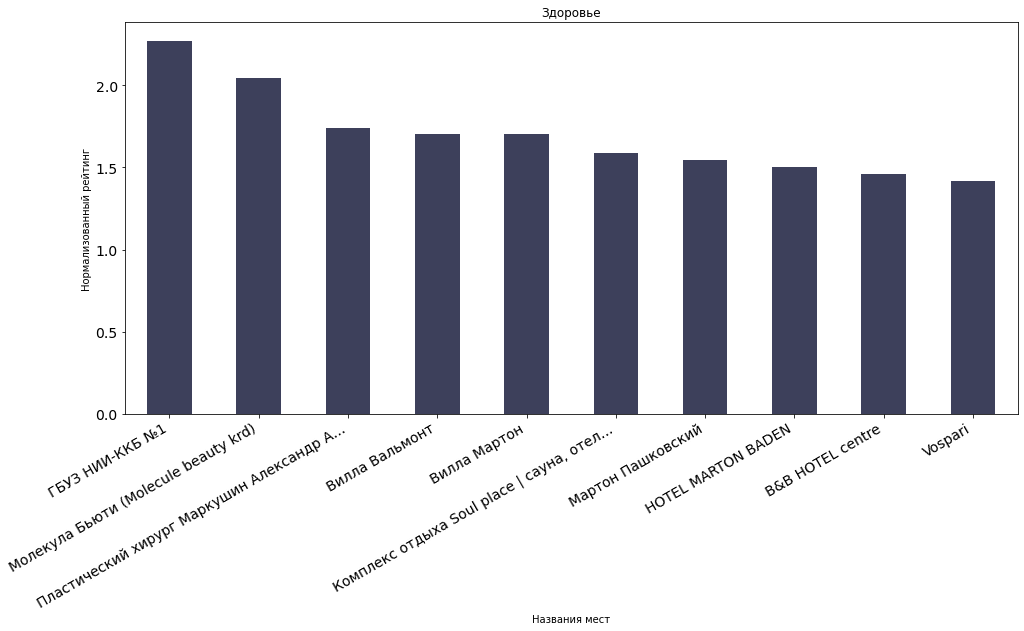

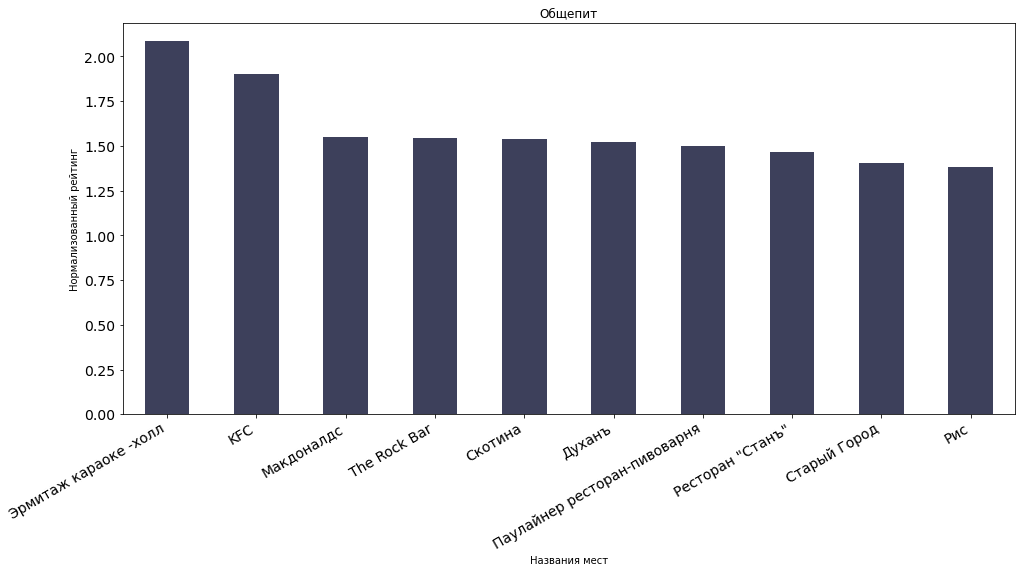

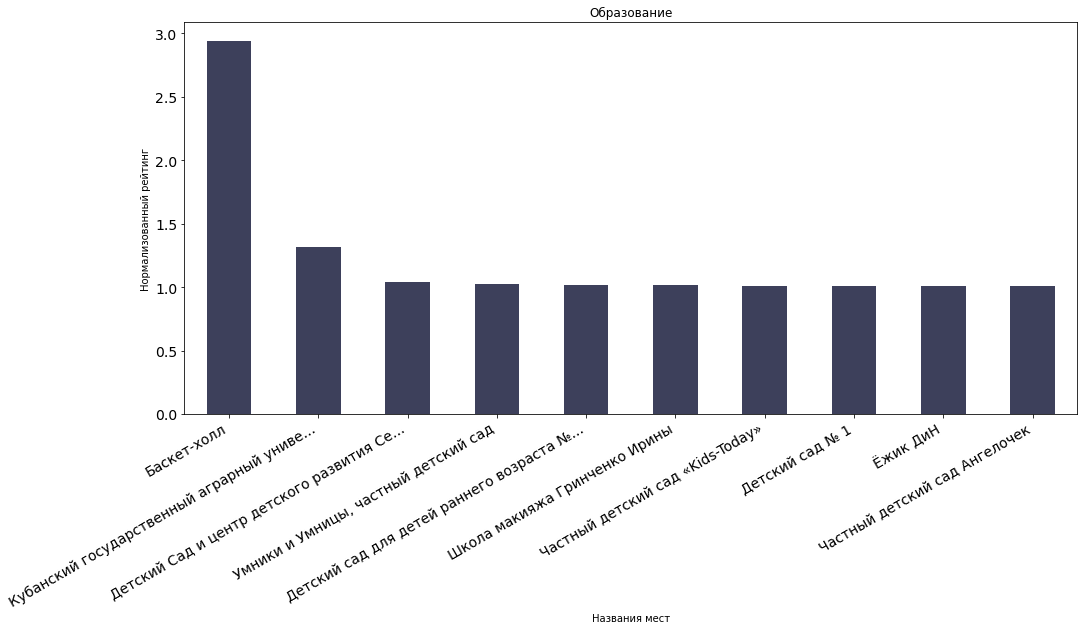

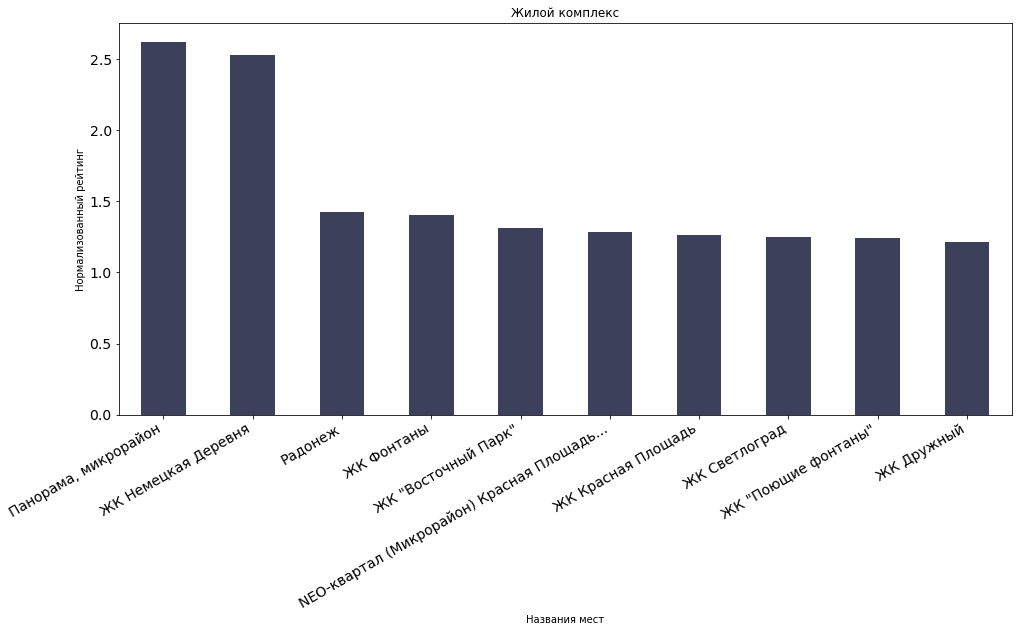

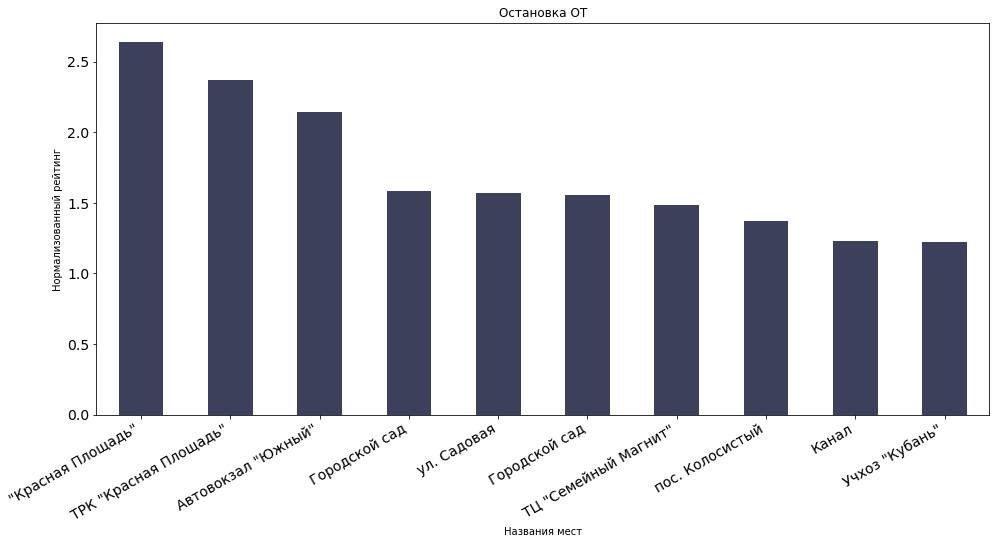

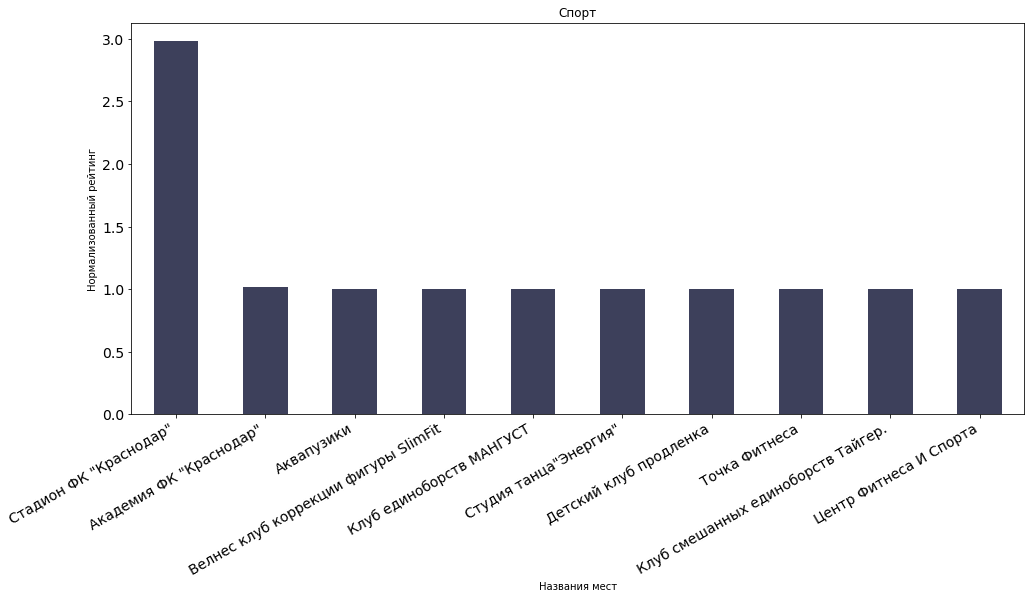

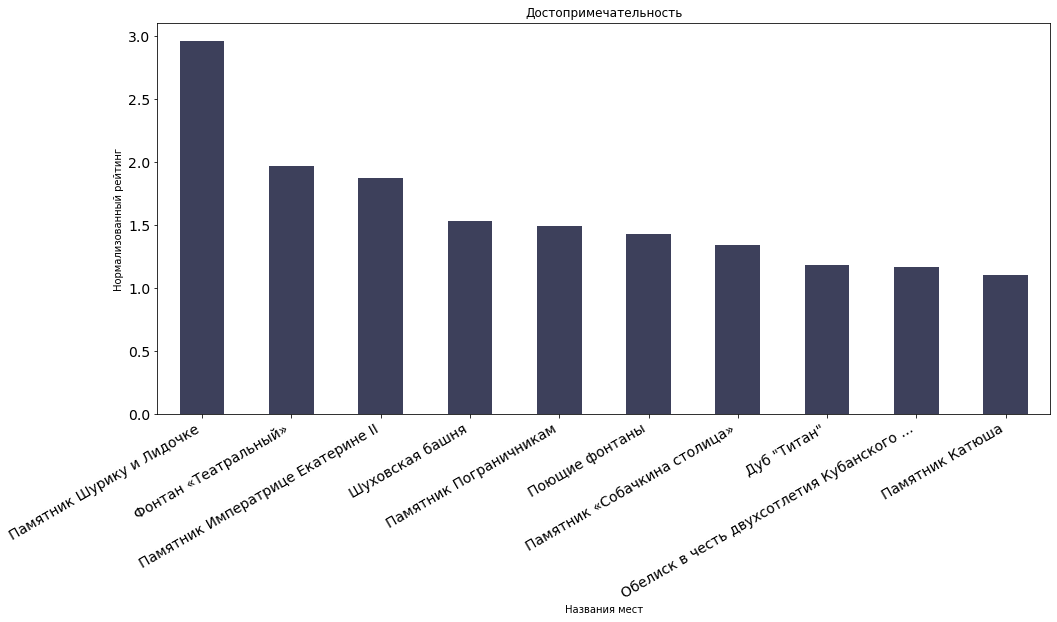

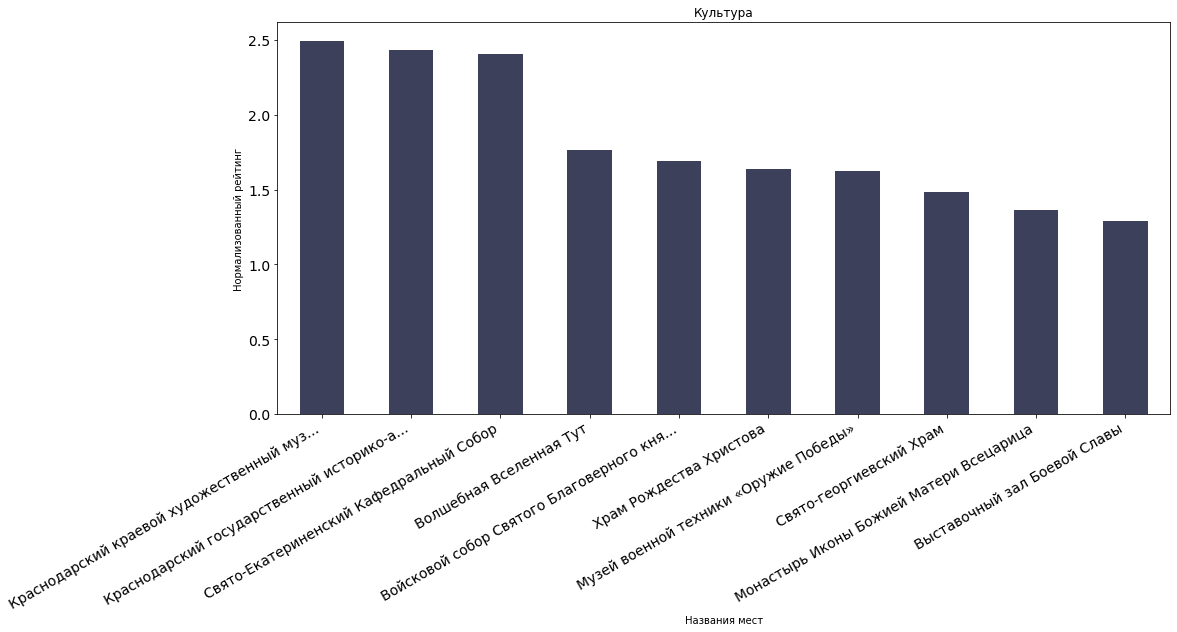

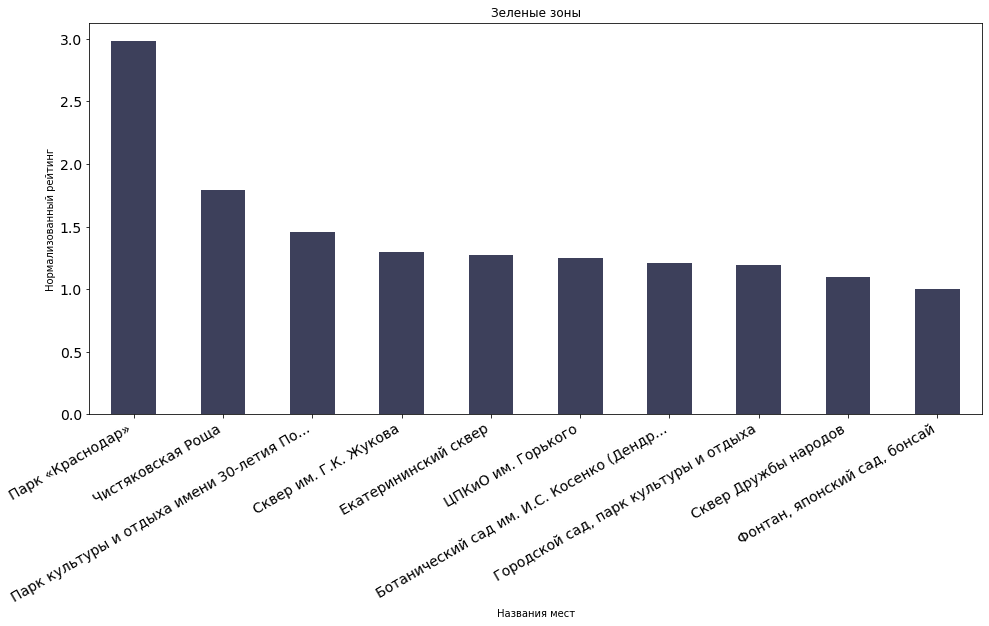

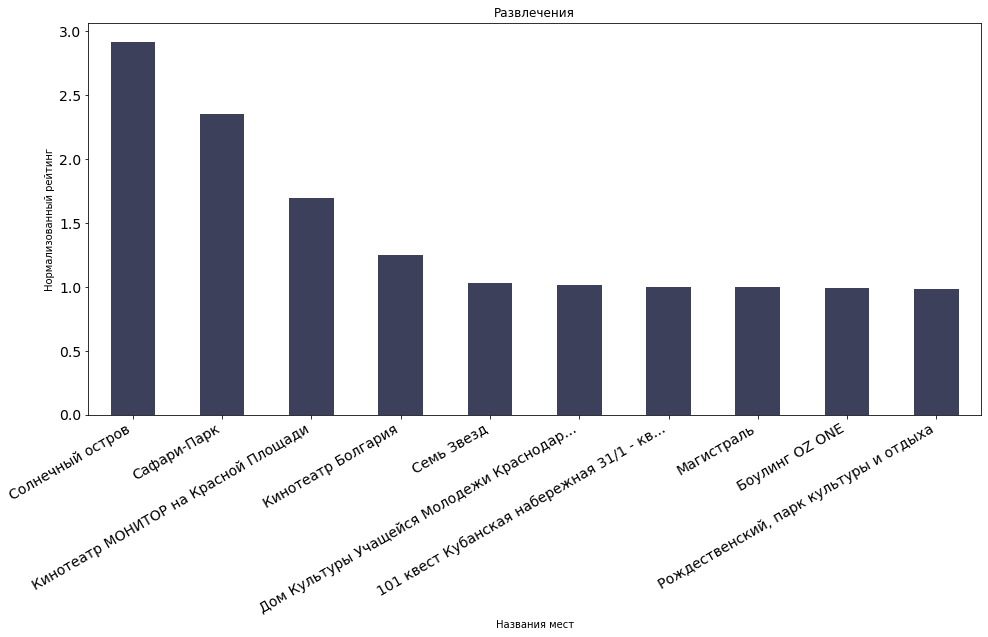

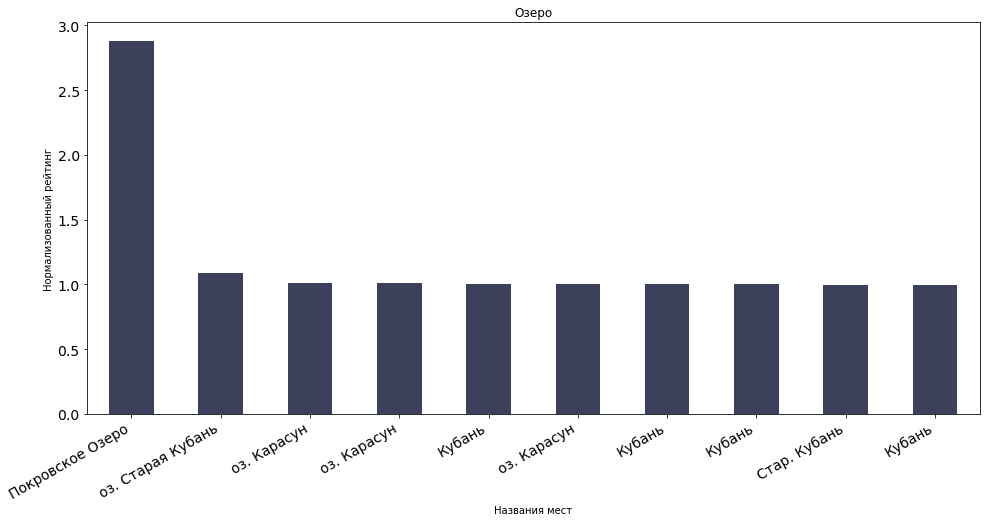

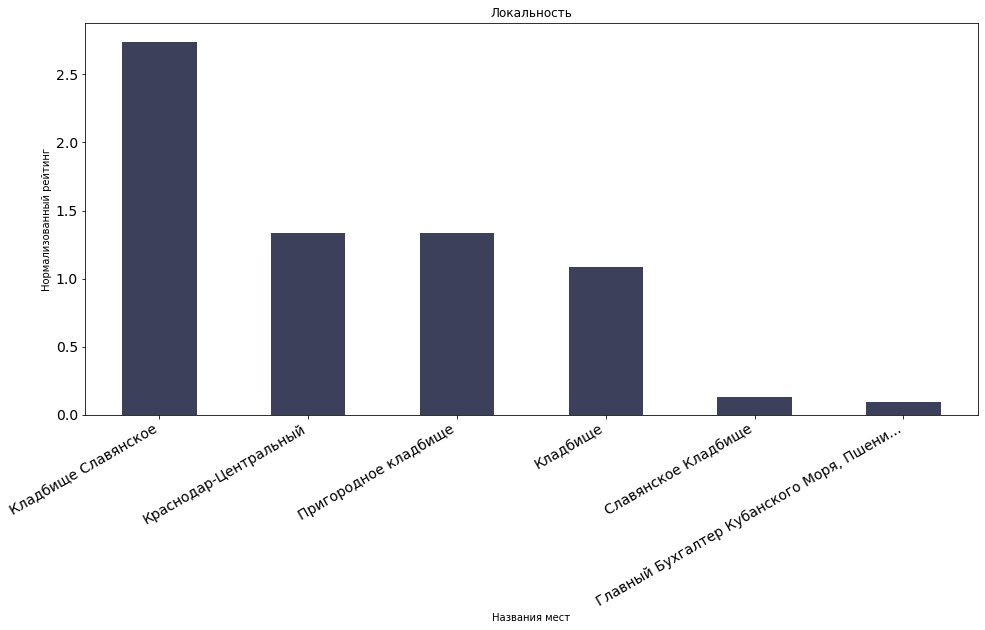

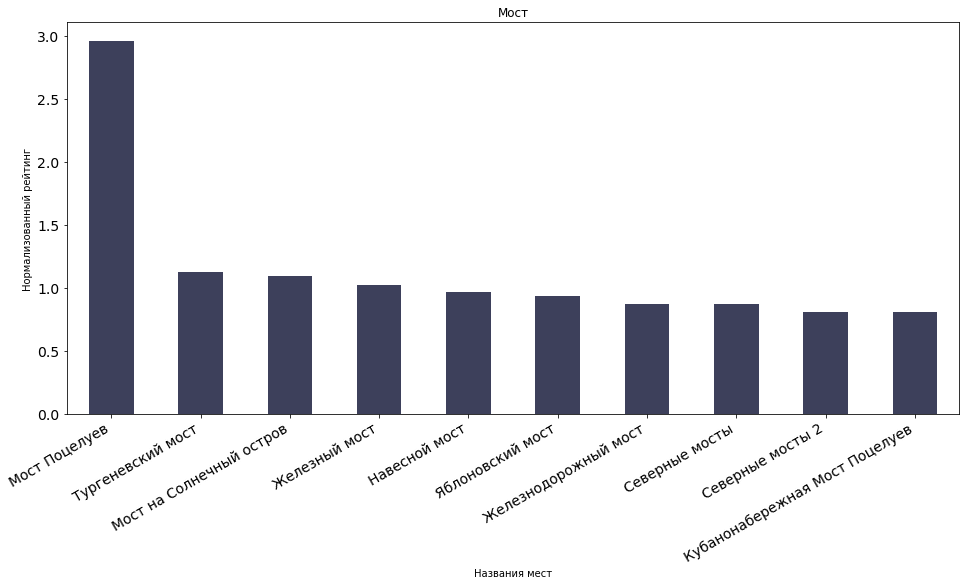

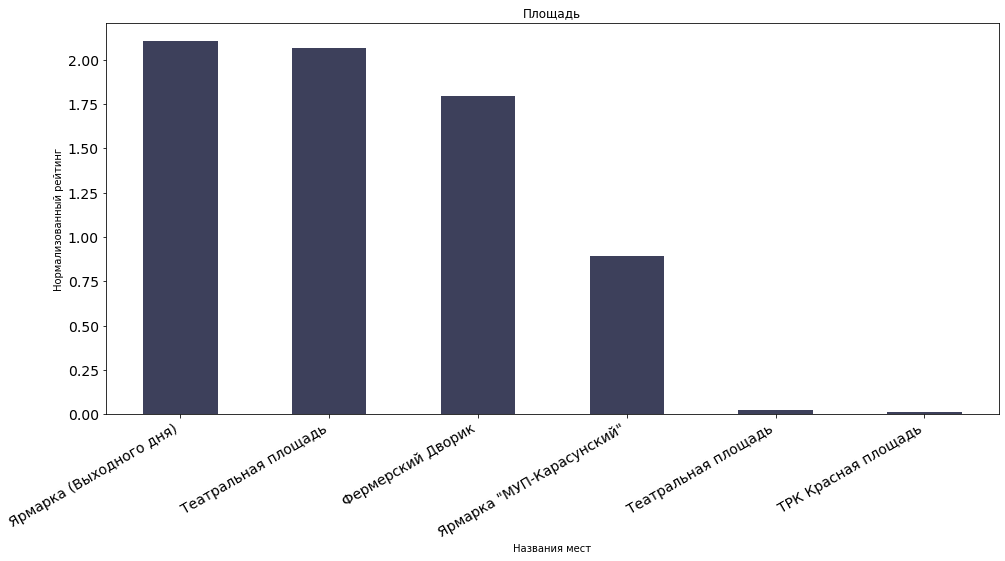

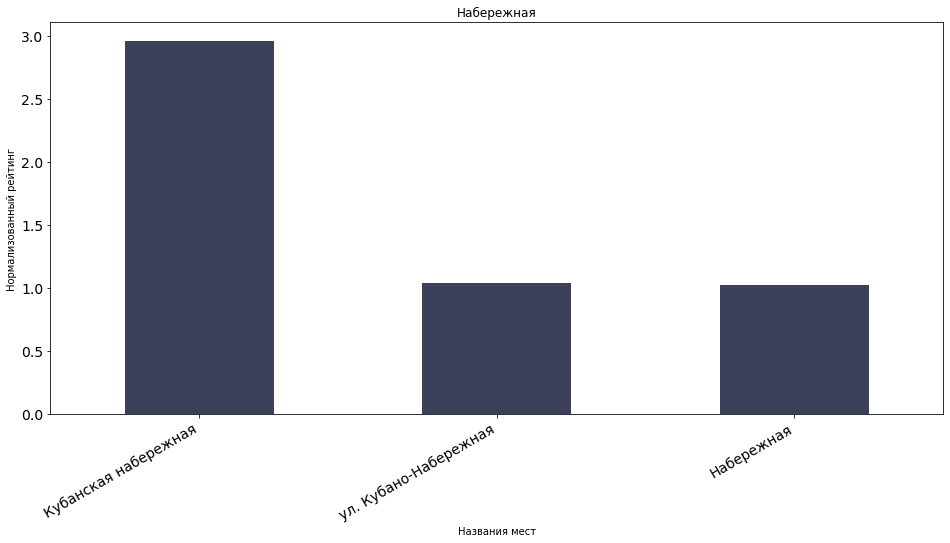

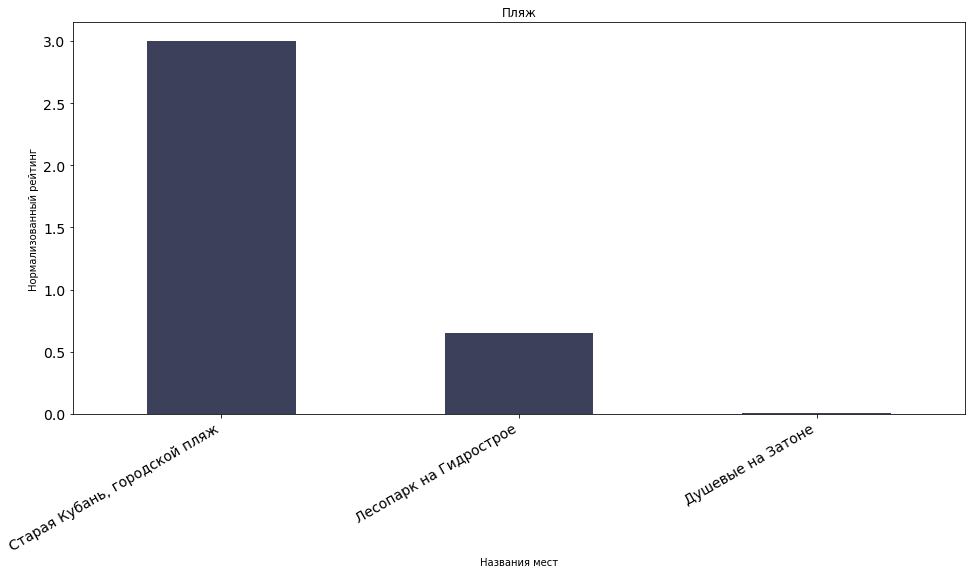

In [52]:
list_top=[]
for i in places_df.category.value_counts().keys():
    plot_df = places_df.loc[(places_df.category==i)&places_df.rating_by_category!=0].sort_values('rating_by_category', ascending = False)[:10]
    list_top.append(plot_df)
    plot_df.title = plot_df.title.apply(lambda x: x[:40]+'...' if len(x)>40 else x)
    
    plot_df.set_index('title')['rating_by_category'].plot.bar(color ="#3D405B" , figsize = (16, 8), fontsize=14)
    plt.title(i)
    plt.gcf().autofmt_xdate()
    plt.xlabel('Названия мест')
    plt.ylabel('Нормализованный рейтинг')
    plt.show()

# Определение улиц с большим числом категории еда

In [54]:
places_df.category.fillna('', inplace = True)

In [58]:
places_df.loc[places_df.category.str.contains('Общепит')]

,url,title,address,type,popular_times_bars,geometry,types,rating,count_review,count_photo,category_2,category,normalized_rating,rating_by_category
65,https://www.google.com/maps/place/?q=place_id:...,Шашлычный двор,"ул. Тюляева, 43, Краснодар, Краснодарский край...",Ресторан,NaN,POINT (39.0960469 45.0396082),"['restaurant', 'food', 'point_of_interest', 'e...",4.2,176.0,10.0,Общепит,Общепит,0.845078,0.894984
131,https://www.google.com/maps/place/?q=place_id:...,KFC,"ул. Александра Покрышкина, д. 3, Краснодар, Кр...",Фастфуд,"['Загруженность в 06:00: 0%.', 'Загруженность ...",POINT (38.9497861 45.1079132),"['restaurant', 'food', 'point_of_interest', 'e...",2.3,27.0,3.0,Общепит,Общепит,0.460803,0.468627
167,https://www.google.com/maps/place/?q=place_id:...,Палитра Суши,"Кружевная, 5, Краснодар, Краснодарский край, 3...",Суши,NaN,POINT (39.06545699999999 44.99295389999999),"['restaurant', 'food', 'point_of_interest', 'e...",NaN,NaN,NaN,Общепит,Общепит,0.000000,0.000000
168,https://www.google.com/maps/place/?q=place_id:...,Flat White Flat,"Конгрессная, 23, Краснодар, Краснодарский край...",Кофейня,NaN,POINT (38.9624194 45.1072286),"['cafe', 'food', 'point_of_interest', 'store',...",4.5,2.0,NaN,Общепит,Общепит,0.900056,0.900610
198,https://www.google.com/maps/place/?q=place_id:...,RAI-SPA,NaN,NaN,"['Загруженность в 04:00: 87%.', 'Загруженность...",POINT (39.01081070000001 45.0110473),"['night_club', 'spa', 'lodging', 'bar', 'healt...",4.8,283.0,298.0,Общепит,Общепит,0.972854,1.085327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15487,https://www.google.com/maps/place/?q=place_id:...,Тихий берег,"ул. Калинина, 1/16, Краснодар, Краснодарский к...",Кафе,NaN,POINT (38.8971557 45.0565597),"['cafe', 'food', 'point_of_interest', 'establi...",3.0,2.0,NaN,Общепит,Общепит,0.600056,0.600610
15493,https://www.google.com/maps/place/?q=place_id:...,Сказка,"ул. Кубанская набережная, 52/3, Краснодар, Кра...",Кафе,"['Загруженность в 04:00: 45%.', 'Загруженность...",POINT (38.9600799 45.0192345),"['cafe', 'meal_takeaway', 'restaurant', 'food'...",4.4,176.0,21.0,Общепит,Общепит,0.885261,0.936425
15520,https://www.google.com/maps/place/?q=place_id:...,Мадьяр-Гриль,"ул. Дзержинского, 100, Краснодар, Краснодарски...",Ресторан,"['Загруженность в 06:00: 0%.', 'Загруженность ...",POINT (38.9831636 45.1007007),"['restaurant', 'bar', 'food', 'point_of_intere...",4.6,170.0,32.0,Общепит,Общепит,0.925277,0.976035
15523,https://www.google.com/maps/place/?q=place_id:...,"Патрик & Мари, Сеть кулинарий","ул. Кубанская набережная, 35, Краснодар, Красн...",Кафе-кондитерская,"['Загруженность в 04:00: 0%.', 'Загруженность ...",POINT (38.9594648 45.0246223),"['meal_delivery', 'bakery', 'food', 'point_of_...",4.5,225.0,188.0,Общепит,Общепит,0.909406,0.993235


In [55]:
food_streets = places_df.loc[places_df.category.str.contains('Общепит'), 'address'].str.split(',').explode().str.lower().str.strip().value_counts().reset_index()

In [72]:
food_streets.loc[(~food_streets['index'].str.isnumeric())][:40]

,index,address
0,краснодарский край,441
1,краснодар,430
7,ул. кубанская набережная,23
13,ул. красных партизан,15
15,ул. восточно-кругликовская,14
16,ул. дзержинского,12
17,остановочный комплекс,12
20,ул. уральская,10
23,ул. ставропольская,10
32,ул. трамвайная,8


In [149]:
db = gdf.to_crs(epsg=4326)

epsg:3857


In [69]:
gdf = gpd.GeoDataFrame(places_df)
gdf.geometry = [shapely.wkt.loads(r['geometry']) for i, r in gdf.iterrows()]

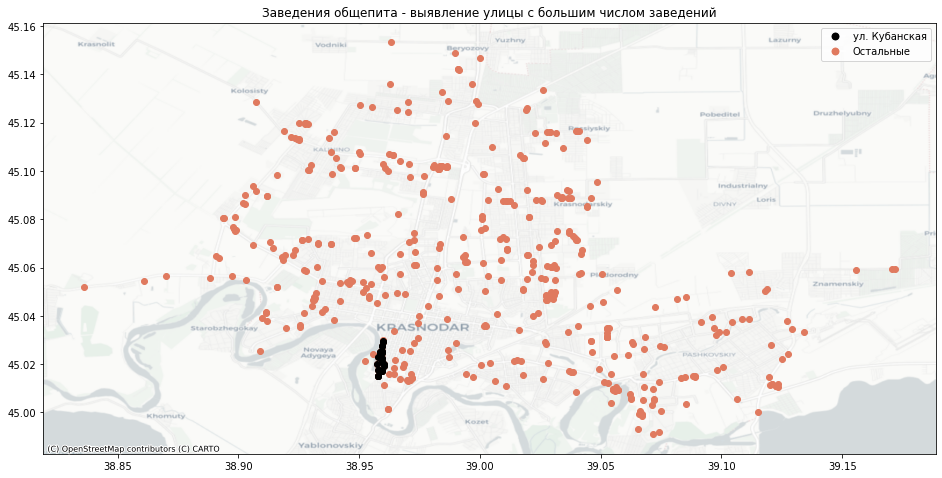

In [152]:
ax = gdf.loc[gdf.category.str.contains('Общепит')].plot(figsize = (16, 15), color = '#E07A5F', legend = True)
gdf.loc[(gdf.category.str.contains('Общепит')) & gdf.address.str.lower().str.contains('кубанская набережная')].plot(ax = ax, color = 'k', legend = True)
cx.add_basemap(ax, crs = db.crs, source = cx.providers.CartoDB.Positron)
plt.title('Заведения общепита - выявление улицы с большим числом заведений')
legend_elements = [Line2D([0], [0], marker='o', color = 'white',label='ул. Кубанская',markerfacecolor='black', markersize=9),
                   Line2D([0], [0], marker='o', color = 'white', label='Остальные',markerfacecolor='#E07A5F', markersize=9)]
plt.legend(handles = legend_elements)


In [127]:
print(cx.providers.CartoDB.keys())

dict_keys(['Positron', 'PositronNoLabels', 'PositronOnlyLabels', 'DarkMatter', 'DarkMatterNoLabels', 'DarkMatterOnlyLabels', 'Voyager', 'VoyagerNoLabels', 'VoyagerOnlyLabels', 'VoyagerLabelsUnder'])
